# Compare SnowMIP forcing files

 
Krinner, G., Derksen, C., Essery, R., Flanner, M., Hagemann, S., Clark, M., Hall, A., Rott, H., Brutel-Vuilmet, C., Kim, H., Ménard, C. B., Mudryk, L., Thackeray, C., Wang, L., Arduini, G., Balsamo, G., Bartlett, P., Boike, J., Boone, A., Chéruy, F., Colin, J., Cuntz, M., Dai, Y., Decharme, B., Derry, J., Ducharne, A., Dutra, E., Fang, X., Fierz, C., Ghattas, J., Gusev, Y., Haverd, V., Kontu, A., Lafaysse, M., Law, R., Lawrence, D., Li, W., Marke, T., Marks, D., Ménégoz, M., Nasonova, O., Nitta, T., Niwano, M., Pomeroy, J., Raleigh, M. S., Schaedler, G., Semenov, V., Smirnova, T. G., Stacke, T., Strasser, U., Svenson, S., Turkov, D., Wang, T., Wever, N., Yuan, H., Zhou, W., and Zhu, D.: ESM-SnowMIP: assessing snow models and quantifying snow-related climate feedbacks, Geosci. Model Dev., 11, 5027–5049, https://doi.org/10.5194/gmd-11-5027-2018, 2018.

**Data availability.**

Site forcing data are available through https://www.geos.ed.ac.uk/~ressery/ESM-SnowMIP/netcdf.zip (last access: 7 December 2018). The Weissfluhjoch data are accessible via https://doi.org/10.16904/16 (WSL, 2017). A paper describing the site-scale input data is currently in preparation.

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar

In [2]:
path = '/home/lalandmi/Dropbox/data/SnowMIP/forcing'
path_lejeune2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP/'

## Check the Col de Porte site

In [3]:
ds = xr.open_dataset(path+'/met_insitu_cdp_1994_2014.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 175320)
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Data variables:
    LWdown   (time) float32 ...
    Psurf    (time) float32 ...
    Qair     (time) float32 ...
    Rainf    (time) float32 ...
    Snowf    (time) float32 ...
    SWdown   (time) float32 ...
    Tair     (time) float32 ...
    Wind     (time) float32 ...

In [4]:
ds2 = xr.open_dataset(path_lejeune2019+'/CRYOBSCLIM.CDP.2018.MetInsitu.nc')
ds2

<xarray.Dataset>
Dimensions:       (Number_of_points: 1, time: 254209)
Coordinates:
  * time          (time) datetime64[ns] 1993-08-01T06:00:00 ... 2022-08-01T06...
Dimensions without coordinates: Number_of_points
Data variables:
    FRC_TIME_STP  float32 ...
    CO2air        (time, Number_of_points) float32 ...
    DIR_SWdown    (time, Number_of_points) float32 ...
    flag          (time, Number_of_points) float32 ...
    HUMREL        (time, Number_of_points) float32 ...
    LWdown        (time, Number_of_points) float32 ...
    NEB           (time, Number_of_points) float32 ...
    PSurf         (time, Number_of_points) float32 ...
    Qair          (time, Number_of_points) float32 ...
    Rainf         (time, Number_of_points) float32 ...
    SCA_SWdown    (time, Number_of_points) float32 ...
    Snowf         (time, Number_of_points) float32 ...
    Tair          (time, Number_of_points) float32 ...
    Wind          (time, Number_of_points) float32 ...
    Wind_DIR      (time, Number_of_points) float32 ...
    LAT           (Number_of_points) float32 ...
    LON           (Number_of_points) float32 ...
    UREF          (Number_of_points) float32 ...
    ZREF          (Number_of_points) float32 ...
    ZS            (Number_of_points) float32 ...
    aspect        (Number_of_points) float32 ...
    slope         (Number_of_points) float32 ...
    station       (Number_of_points) float32 ...

### SWDown

In [6]:
da = ds.SWdown
da

<xarray.DataArray 'SWdown' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  SWdown
    CMIP_name:  rsds
    long_name:  Surface downward shortwave radiation
    units:      W/m2

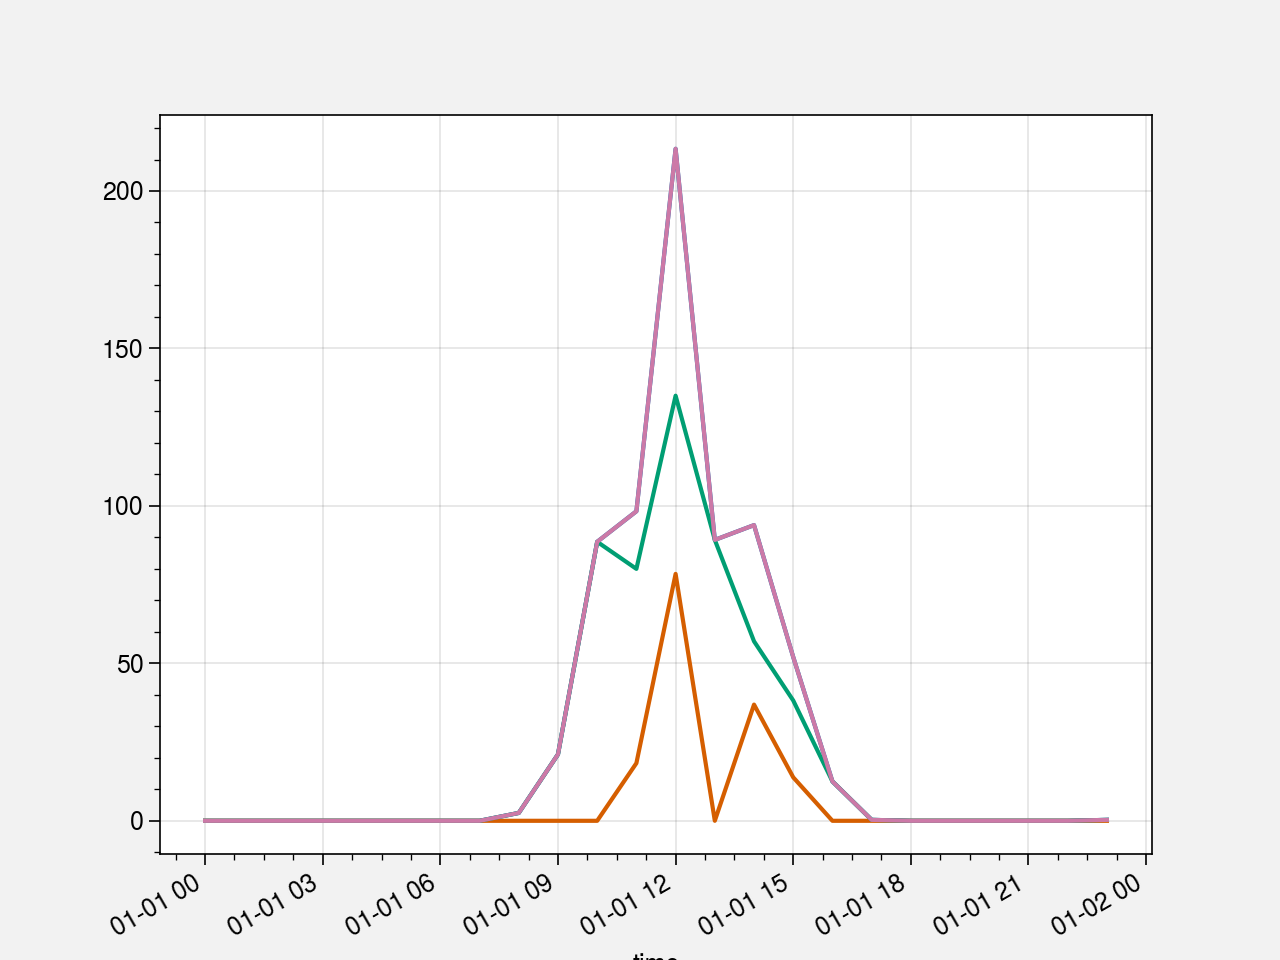

In [7]:
# Local time?
da.sel(time='1996-01-01').plot(label='Total')
ds2.DIR_SWdown.sel(time='1996-01-01').plot(label='Direct')
ds2.SCA_SWdown.sel(time='1996-01-01').plot(label='Scattered')
(ds2.SCA_SWdown+ds2.DIR_SWdown).sel(time='1996-01-01').plot(label='Tot (dir + sca)')

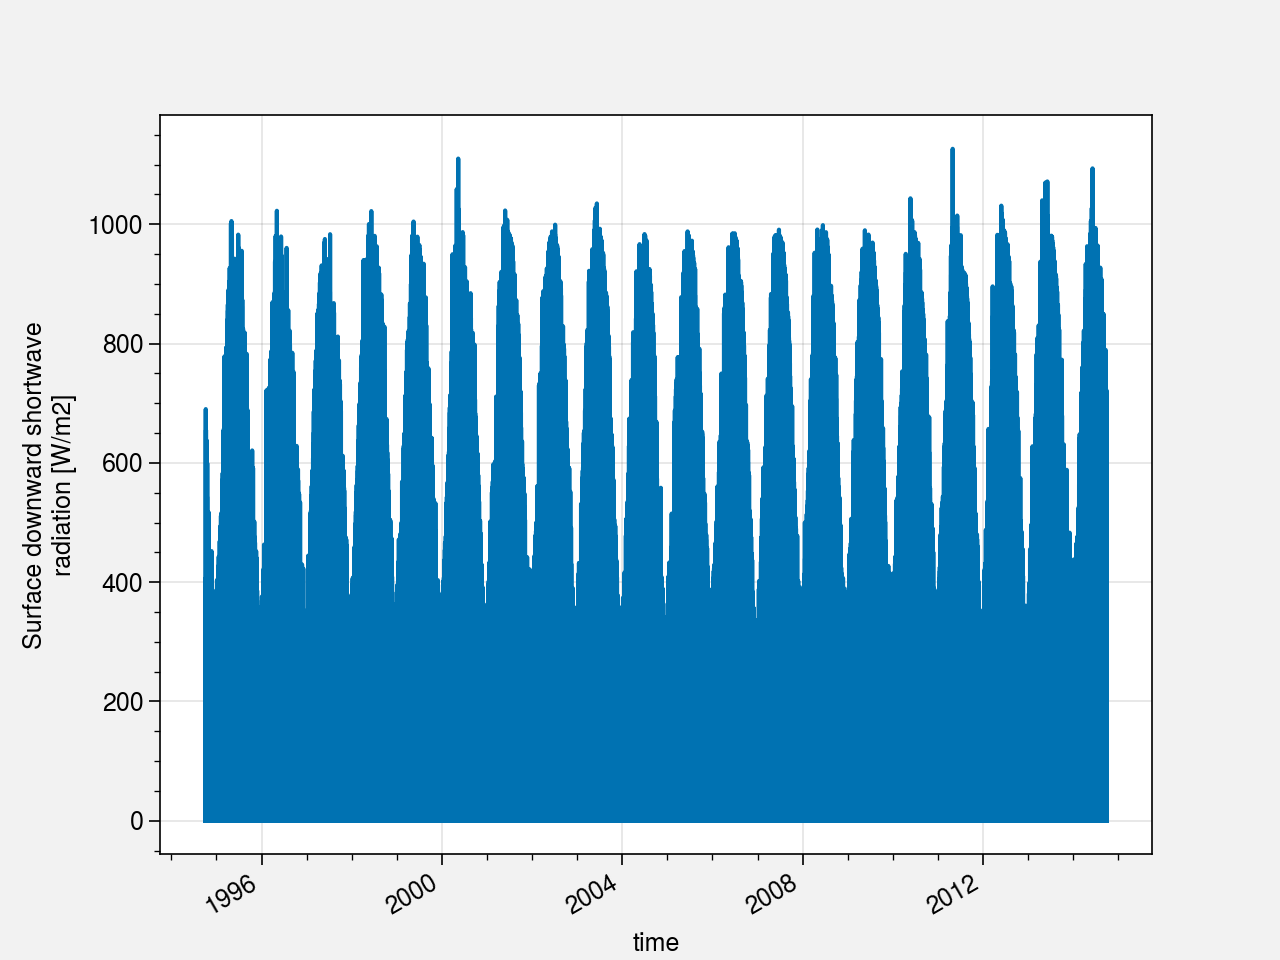

In [13]:
da.plot()

### LWDown

In [14]:
da = ds.LWdown
da

<xarray.DataArray 'LWdown' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  LWdown
    CMIP_name:  rlds
    long_name:  Surface downward longwave radiation
    units:      W/m2

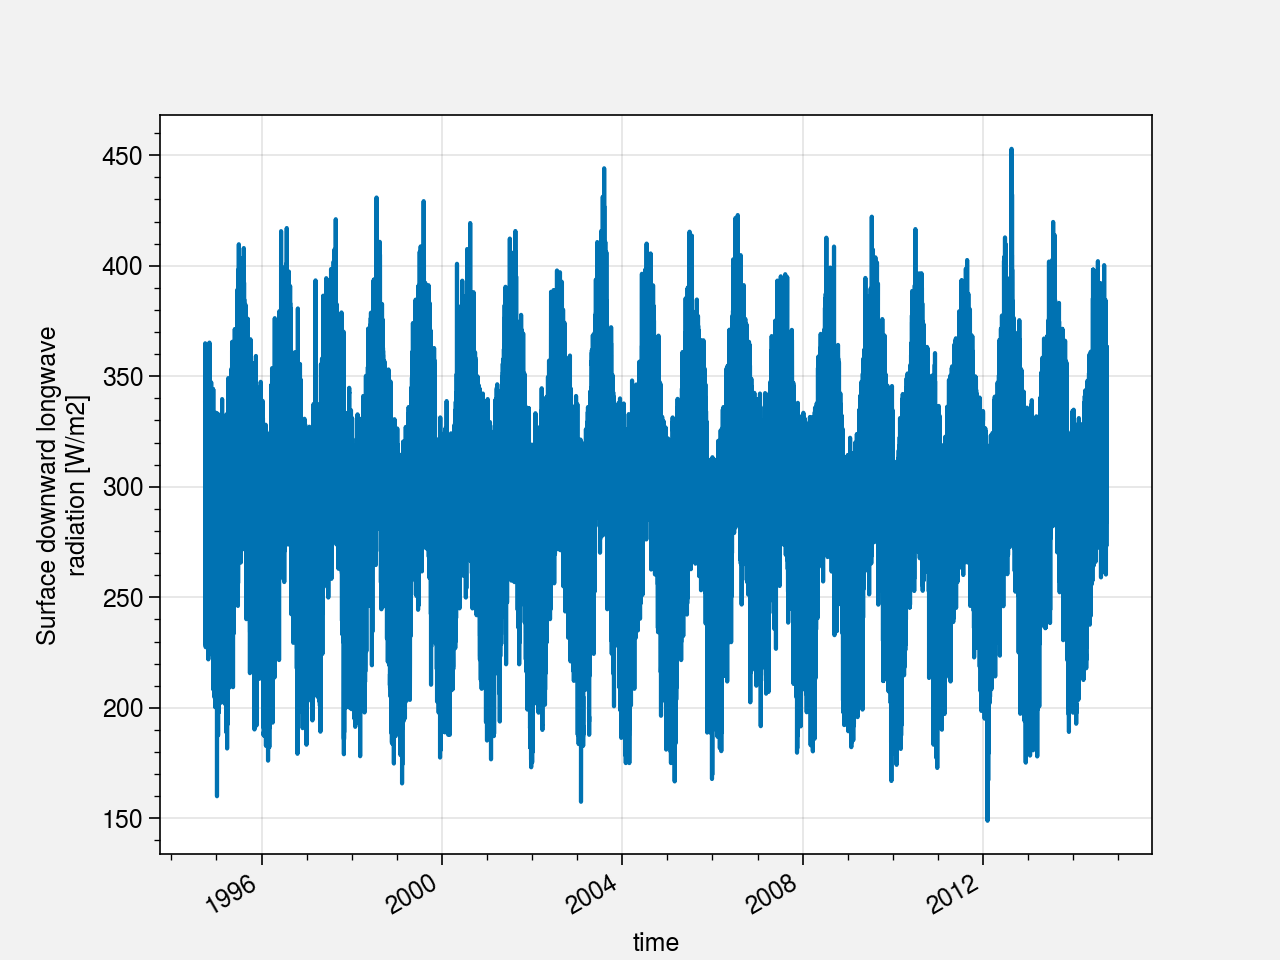

In [15]:
da.plot()

### Rainf

In [16]:
da = ds.Rainf
da

<xarray.DataArray 'Rainf' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  Rainf
    CMIP_name:  prra
    long_name:  Rainfall rate
    units:      kg/m2/s

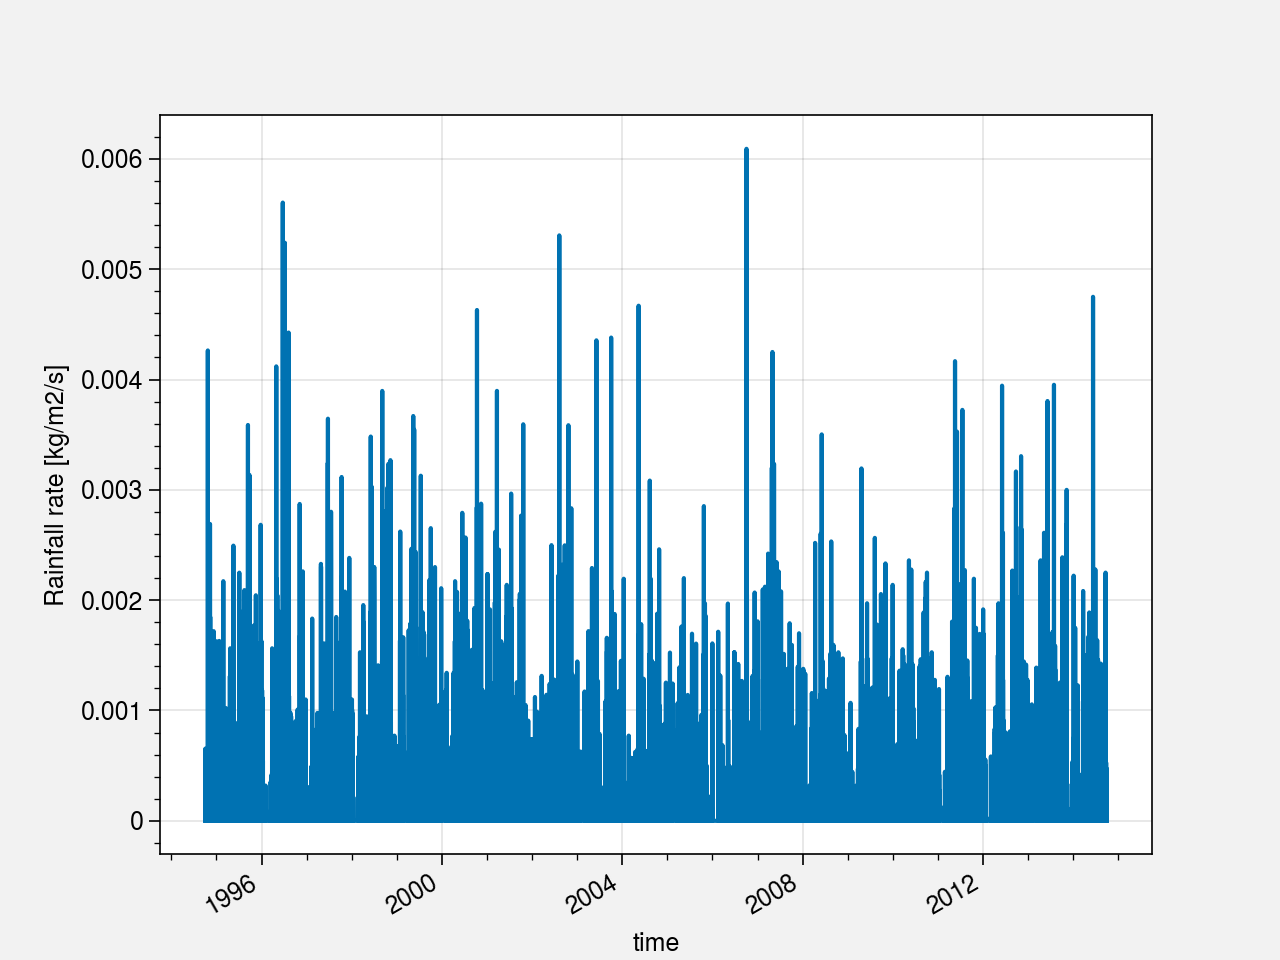

In [17]:
da.plot()

### Snowf

In [17]:
da = ds.Snowf
da

<xarray.DataArray 'Snowf' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  Snowf
    CMIP_name:  prsn
    long_name:  Snowfall rate
    units:      kg/m2/s

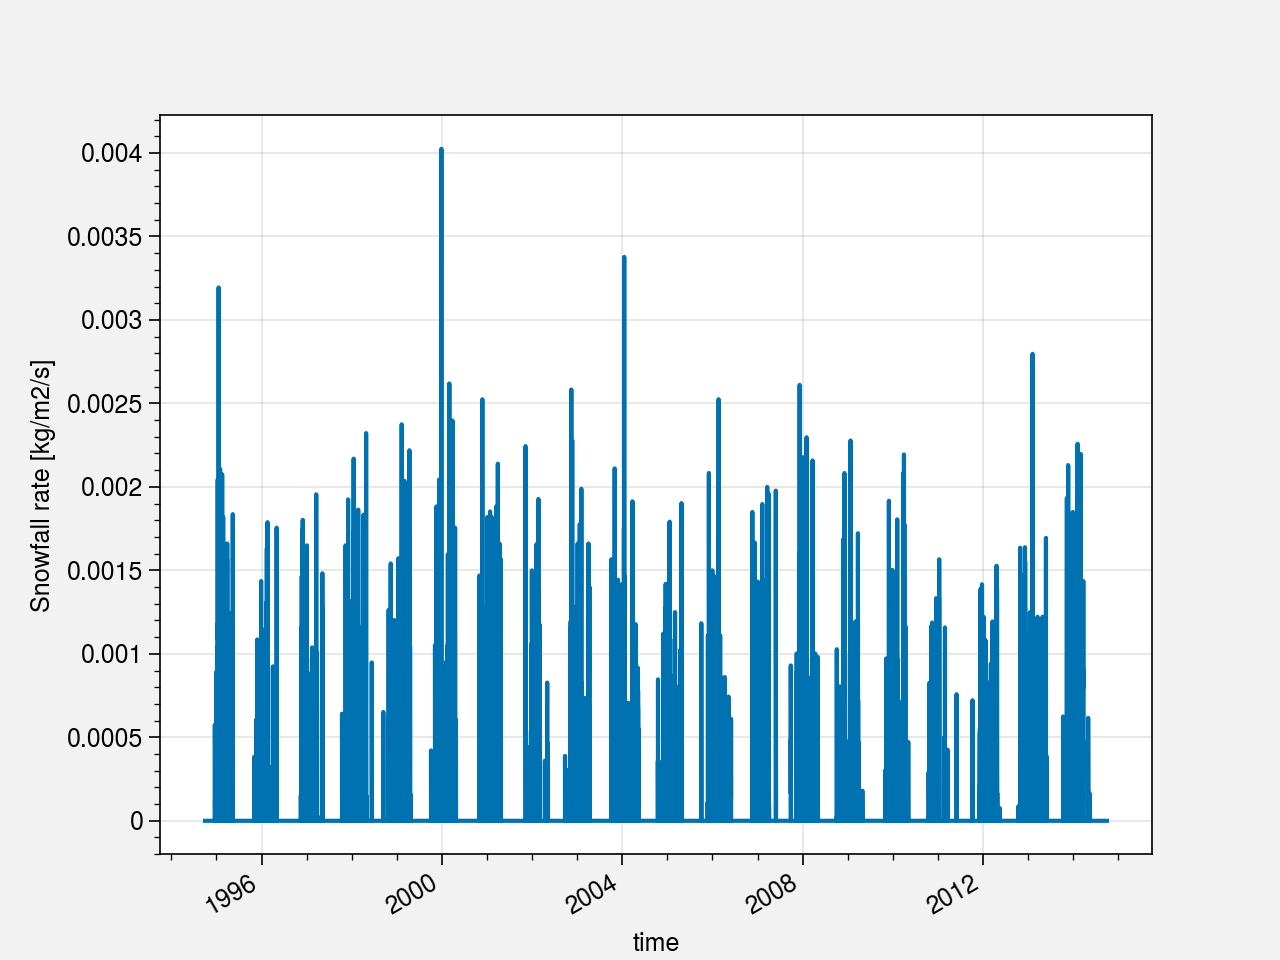

In [19]:
da.plot()

In [23]:
path_morin2012 = '/home/lalandmi/Dropbox/data/SnowMIP/evaluation/FR-Cdp/Morin_2012/datasets'
path_menard2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all'

In [25]:
ds_menard2019 = xr.open_dataset(path_menard2019+'/met_insitu_cdp_1994_2014.nc')

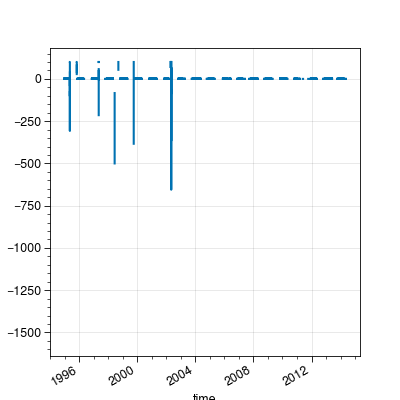

In [26]:
%matplotlib widget
((ds_menard2019.Snowf-ds2.Snowf)/da*100).plot()

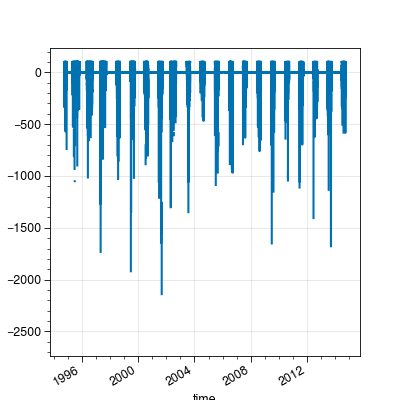

In [31]:
%matplotlib widget
((ds_menard2019.Rainf-ds2.Rainf)/ds_menard2019.Rainf*100).plot()

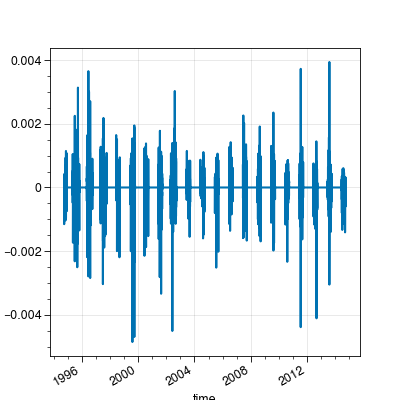

In [32]:
%matplotlib widget
((ds_menard2019.Rainf-ds2.Rainf)).plot()

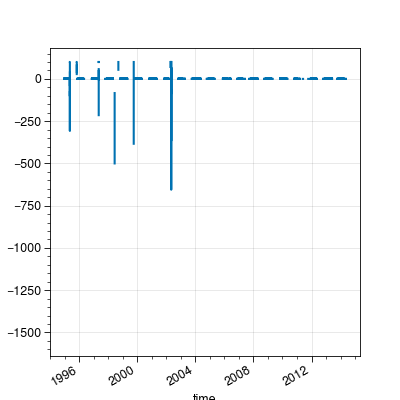

In [21]:
%matplotlib widget
((da-ds2.Snowf)/da*100).plot()

### Near-surface air temperature

In [7]:
da = ds.Tair
da

<xarray.DataArray 'Tair' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  Tair
    CMIP_name:  ta
    long_name:  Near-surface air temperature
    units:      K

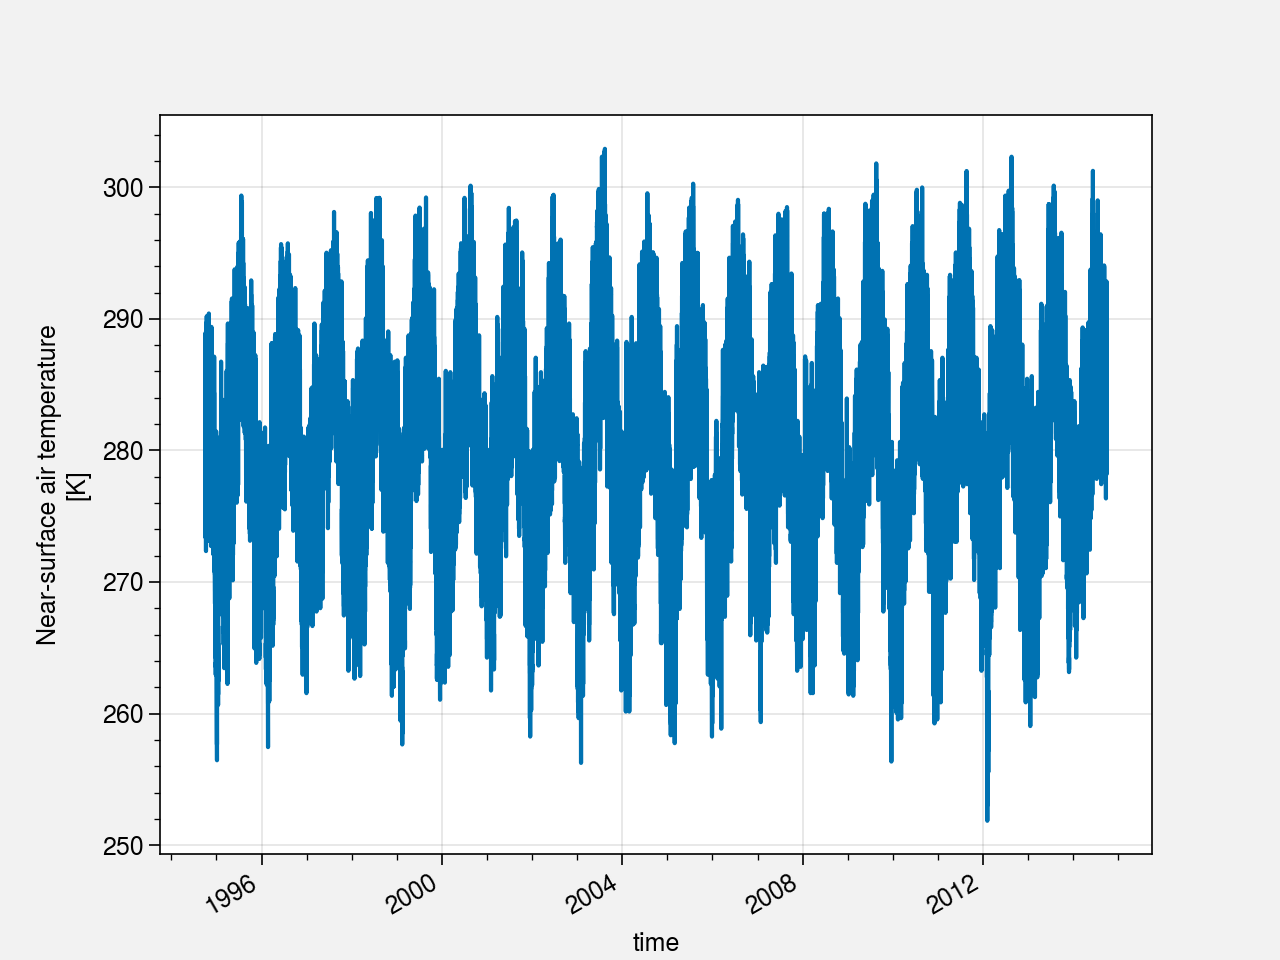

In [8]:
da.plot()

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


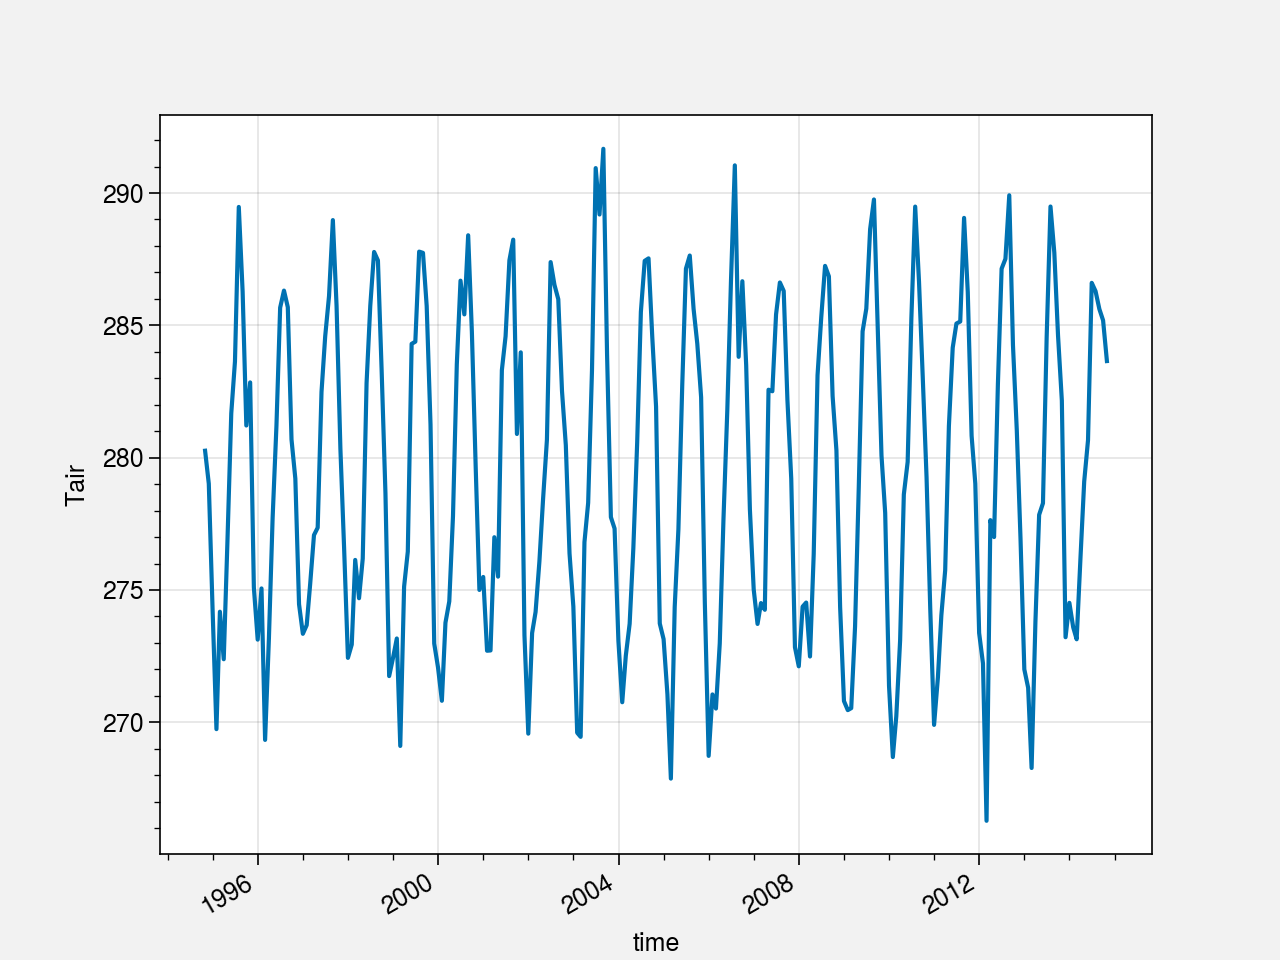

In [9]:
da.resample(time='M').mean().plot()

### Qair

In [29]:
da = ds.Qair
da

<xarray.DataArray 'Qair' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  Qair
    CMIP_name:  hus
    long_name:  Near-surface specific humidity
    units:      kg/kg

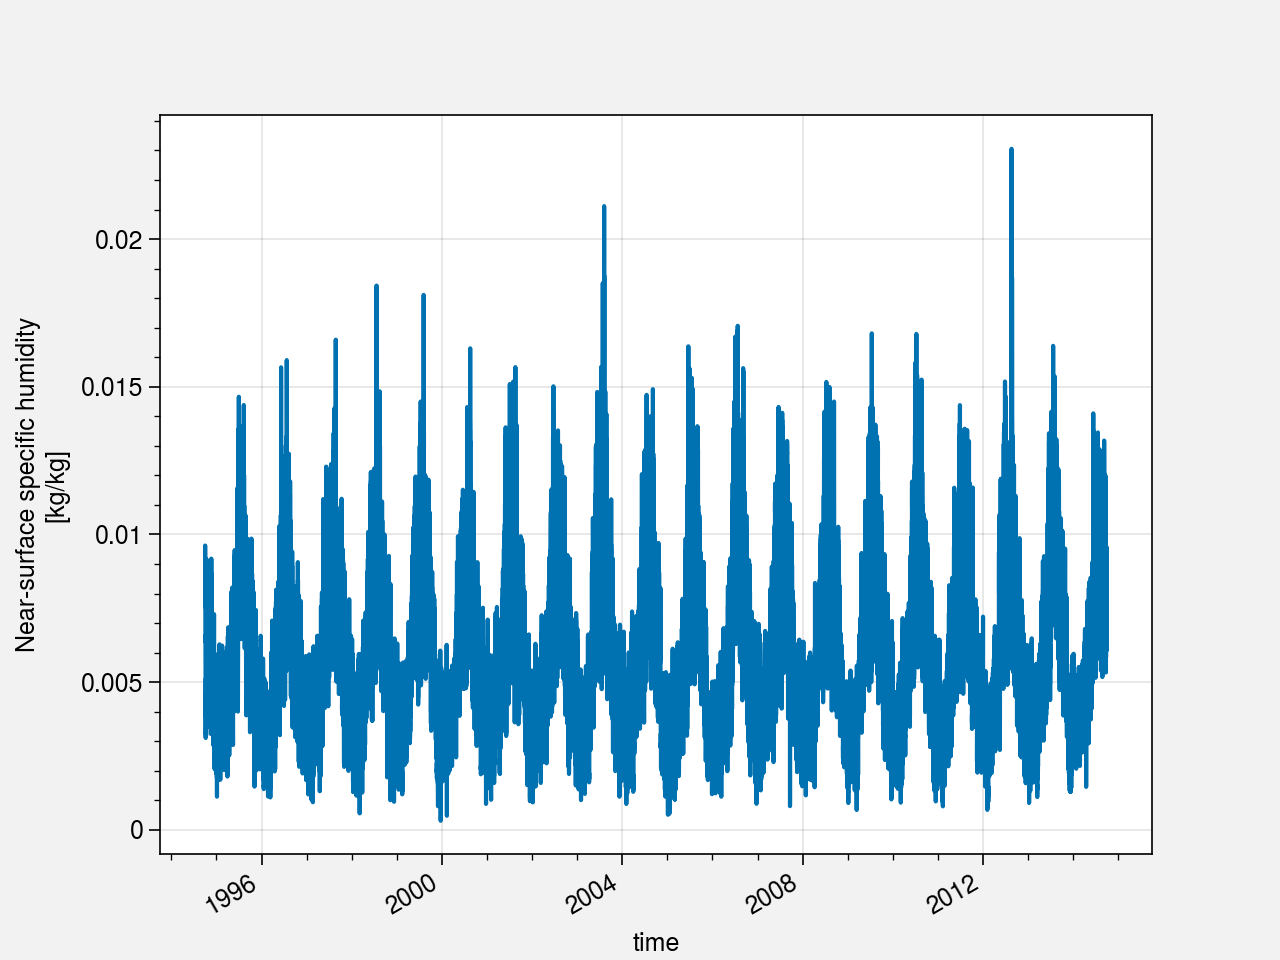

In [30]:
da.plot()

### Wind

In [31]:
da = ds.Wind
da

<xarray.DataArray 'Wind' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  Wind
    CMIP_name:  ws
    long_name:  Near-surface wind speed
    units:      m/s

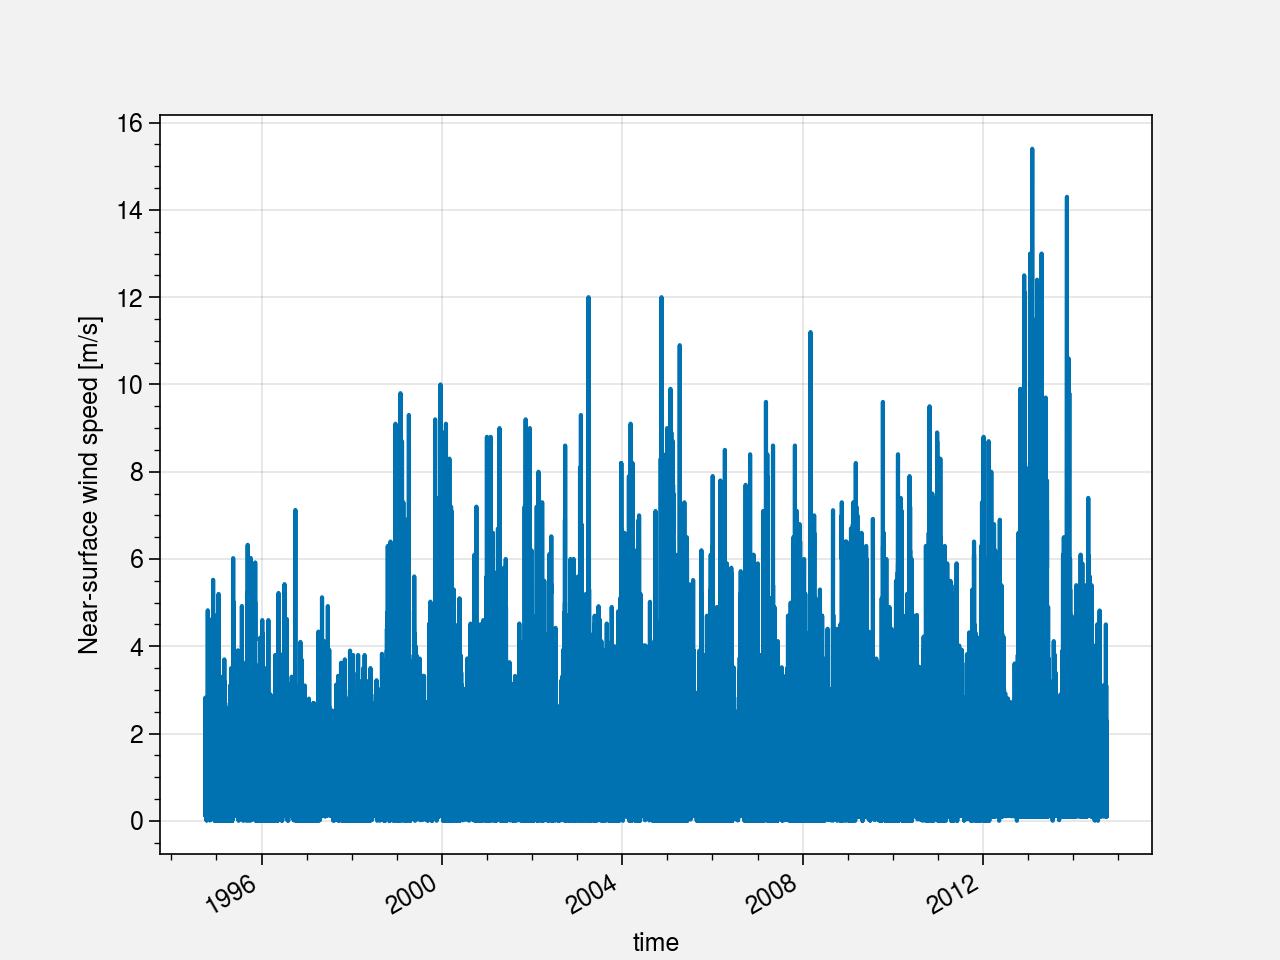

In [32]:
da.plot()

### Psurf
No variation... weird?

In [33]:
da = ds.Psurf
da

<xarray.DataArray 'Psurf' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  Psurf
    CMIP_name:  ps
    long_name:  Surface pressure
    units:      Pa

In [39]:
da.max()

<xarray.DataArray 'Psurf' ()>
array(86382.6875)

In [40]:
da.min()

<xarray.DataArray 'Psurf' ()>
array(86382.6875)

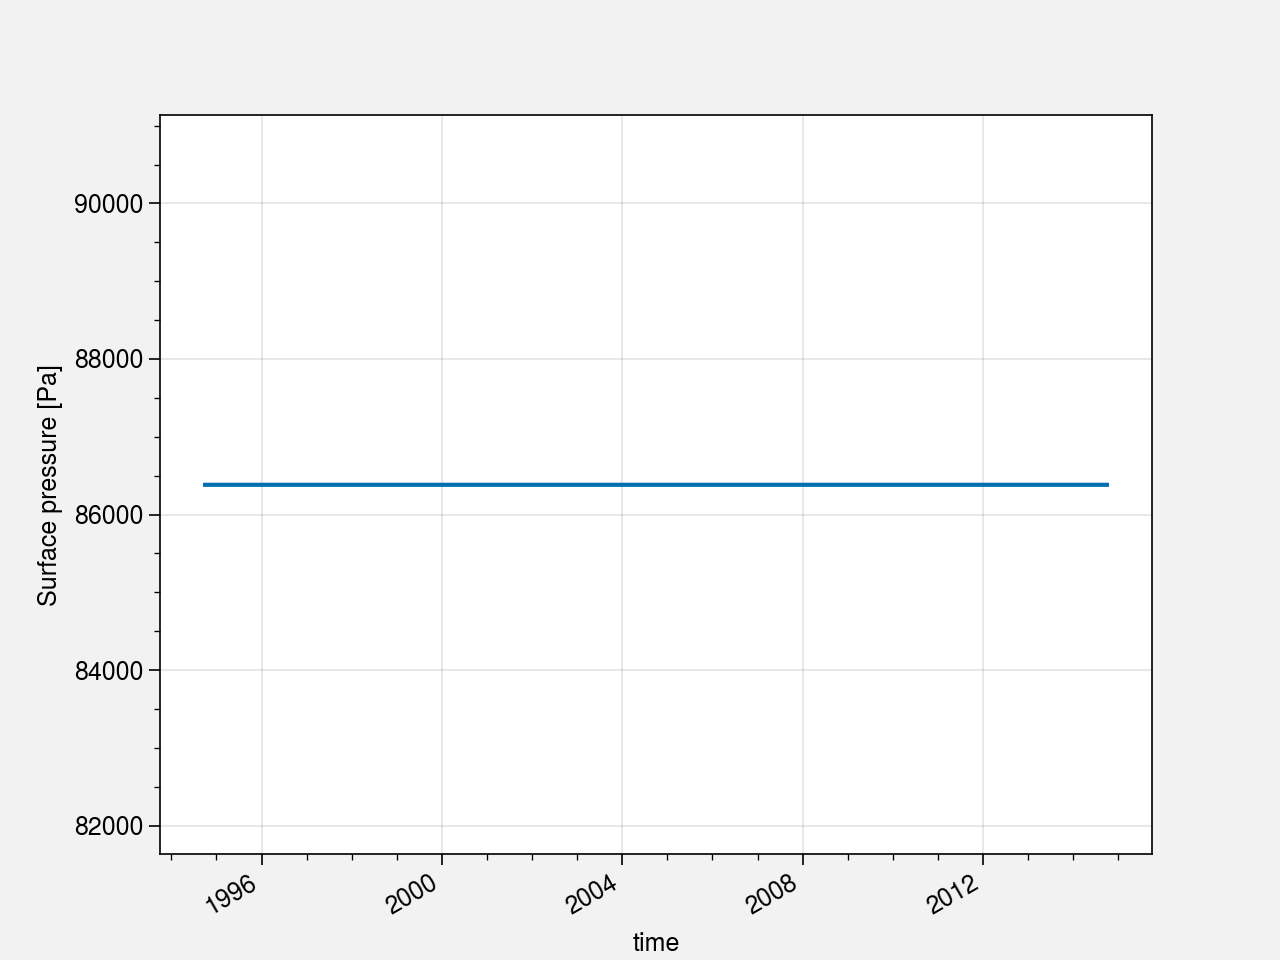

In [41]:
da.plot()